<a href="https://colab.research.google.com/github/ShivaShirsath/dl/blob/master/char.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
df = pd.read_csv(url, header=None)

In [3]:
# Preprocess data
X = df.iloc[:, 1:]
X = X / 15.0
y = df.iloc[:, 0]
y = pd.get_dummies(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Define neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(26, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# Visualize results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

Epoch 1/100
438/438 [==============================] - 2s 3ms/step - loss: 2.7149 - accuracy: 0.2737 - val_loss: 2.0719 - val_accuracy: 0.4432
Epoch 2/100
438/438 [==============================] - 2s 4ms/step - loss: 1.7812 - accuracy: 0.5154 - val_loss: 1.5585 - val_accuracy: 0.5850
Epoch 3/100
438/438 [==============================] - 3s 6ms/step - loss: 1.4525 - accuracy: 0.5989 - val_loss: 1.3600 - val_accuracy: 0.6290
Epoch 4/100
438/438 [==============================] - 2s 5ms/step - loss: 1.3003 - accuracy: 0.6391 - val_loss: 1.2627 - val_accuracy: 0.6565
Epoch 5/100
438/438 [==============================] - 2s 5ms/step - loss: 1.2084 - accuracy: 0.6656 - val_loss: 1.1716 - val_accuracy: 0.6798
Epoch 6/100
438/438 [==============================] - 3s 6ms/step - loss: 1.1392 - accuracy: 0.6859 - val_loss: 1.1177 - val_accuracy: 0.6910
Epoch 7/100
438/438 [==============================] - 3s 6ms/step - loss: 1.0892 - accuracy: 0.6989 - val_loss: 1.0624 - val_accuracy: 0.7117

In [7]:
def plot(op):
  plt.figure(figsize=(10, 5))
  plt.plot(epochs, acc if op else loss, 'bo', label='Training acc')
  plt.plot(epochs, val_acc if op else val_loss, 'b', label='Validation')
  plt.title('Training and validation')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy' if op else 'Loss')
  plt.legend()
  plt.show()

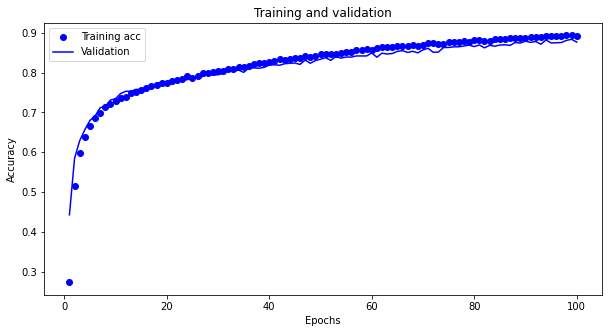

In [8]:
# Plot training and validation accuracy
plot(True)

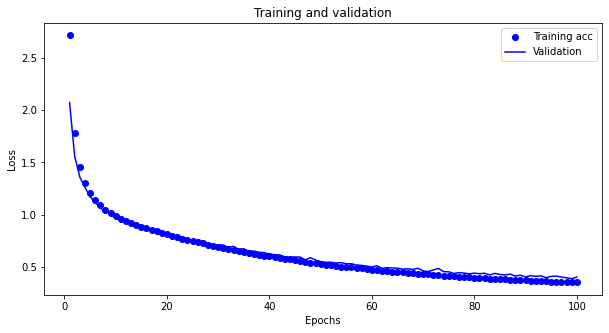

In [9]:
# Plot training and validation loss
plot(False)

In [10]:
# Make predictions on test data 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.array(y_test), axis=1)

188/188 [==============================] - 0s 1ms/step


In [11]:
# Calculate prediction accuracy
test_acc = np.mean(y_pred == y_true)
print("Test accuracy:", test_acc)

Test accuracy: 0.8761666666666666


In [12]:
# Create a confusion matrix
conf_mat = np.zeros((26, 26), dtype=np.int)
for i in range(len(y_true)):
  conf_mat[y_true[i], y_pred[i]] += 1

<ipython-input-12-39721b35542c>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  conf_mat = np.zeros((26, 26), dtype=np.int)


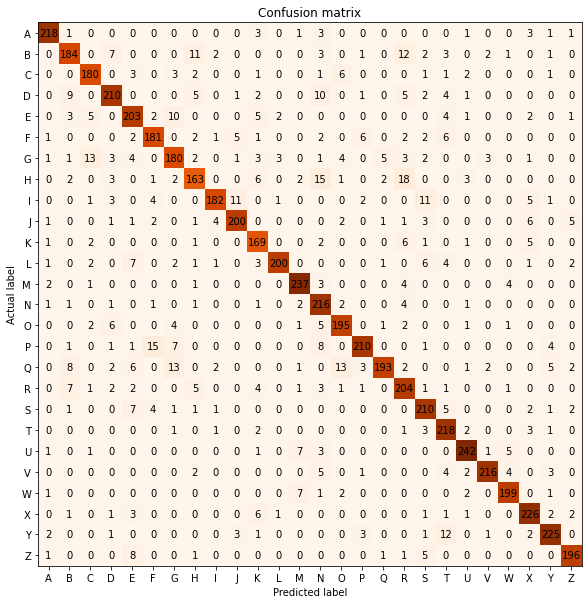

In [13]:
# Visualize prediction accuracy
plt.figure(figsize=(10, 10))
plt.imshow(conf_mat, cmap='Oranges')
plt.xticks(range(26), [chr(ord('A')+i) for i in range(26)])
plt.yticks(range(26), [chr(ord('A')+i) for i in range(26)])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion matrix')
for i in range(26):
    for j in range(26):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='white' if conf_mat[i, j] > len(y_true)*0.05 else 'black')
plt.show()